# Import Modules

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras import Input

import numpy as np
import matplotlib.pyplot as plt
import random

2025-12-02 00:09:59.733527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764630599.753134   17567 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764630599.758818   17567 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764630599.772350   17567 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764630599.772377   17567 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764630599.772380   17567 computation_placer.cc:177] computation placer alr

# Functions

In [2]:
def print_results_dic(dic_result):
    """
    Nice print for summary of all models results
    """
    print("Accuracy on test set are:")
    for key, value in dic_result.items():
        print(f"{value*100:.1f}% : {key}")

dic_result = dict()

# Load Data
60 000 grayscales images in 28x28 pixels of 10 fashion categories

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:, :, :, np.newaxis]/255.0
x_test = x_test[:, :, :, np.newaxis]/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Show images

In [4]:
dict_clothes = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

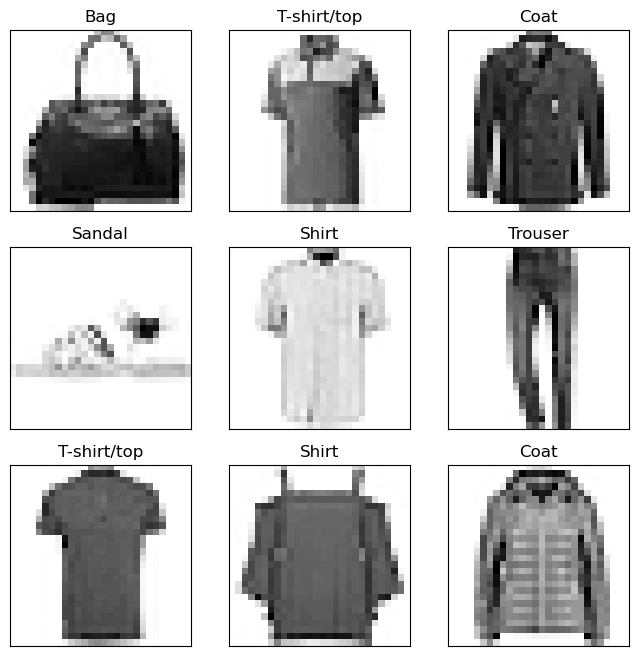

In [5]:
ids = random.sample([i for i in range(x_train.shape[0])],9)
fig, axes = plt.subplots(3,3, figsize=(8,8), sharex=True, sharey=True)
for i, id in enumerate(ids):
    line = i%3
    col = i//3
    axes[line, col].imshow(x_train[id], cmap='Greys')
    axes[line, col].set_title(dict_clothes[np.argmax(y_train[id])])
    axes[line, col].tick_params(
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )


plt.show()

# Perceptron

In [6]:
# 2 layers
# Need to flatten the images for Dense layers of neurons
perceptron = Sequential([
    Input(shape=(28,28,1)),
    Flatten(name="flatten"),
    Dense(10, activation='relu', name='dense_1'),
    Dense(10, activation='softmax', name='output')
])

perceptron.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

I0000 00:00:1764630603.404435   17567 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5523 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:0a:00.0, compute capability: 7.5


In [7]:
perceptron.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = perceptron.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=256,
)

Epoch 1/10


I0000 00:00:1764630605.033060   17625 service.cc:152] XLA service 0x7ceea8005600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764630605.033089   17625 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2025-12-02 00:10:05.051964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764630605.128371   17625 cuda_dnn.cc:529] Loaded cuDNN version 90101


116/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2763 - loss: 1.8940

I0000 00:00:1764630605.603372   17625 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5483 - loss: 1.2537 - val_accuracy: 0.7602 - val_loss: 0.7193
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7826 - loss: 0.6454 - val_accuracy: 0.8017 - val_loss: 0.5773
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8098 - loss: 0.5634 - val_accuracy: 0.8185 - val_loss: 0.5335
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8233 - loss: 0.5226 - val_accuracy: 0.8262 - val_loss: 0.4971
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8320 - loss: 0.4968 - val_accuracy: 0.8335 - val_loss: 0.4805
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.4776 - val_accuracy: 0.8378 - val_loss: 0.4690
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8420 - loss: 0.4639 - val_accuracy: 0.8402 - val_loss: 0.4605
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.4538 - val_accuracy: 0.8433 - val_

In [9]:
dic_result["Perceptron"] = perceptron.evaluate(x_test, y_test)[1]

print_results_dic(dic_result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.4759
Accuracy on test set are:
83.6% : Perceptron


# CNN_1: Conv2D + Dense

In [10]:
cnn_1 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [11]:
cnn_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [12]:
cnn_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn_1.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=256
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7906 - loss: 0.6151 - val_accuracy: 0.8535 - val_loss: 0.4116
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8645 - loss: 0.3912 - val_accuracy: 0.8700 - val_loss: 0.3631
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8797 - loss: 0.3474 - val_accuracy: 0.8712 - val_loss: 0.3578
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8857 - loss: 0.3257 - val_accuracy: 0.8808 - val_loss: 0.3344
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8928 - loss: 0.3064 - val_accuracy: 0.8882 - val_loss: 0.3177
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8966 - loss: 0.2933 - val_accuracy: 0.8955 - val_loss: 0.3029
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9003 - loss: 0.2849 - val_accuracy: 0.8907 - val_loss: 0.3053
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9033 - loss: 0.2735 - val_accuracy: 0

In [14]:
dic_result["CNN_1: Conv2D + MP + Dense"] = cnn_1.evaluate(x_test, y_test)[1]

print_results_dic(dic_result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8917 - loss: 0.3094
Accuracy on test set are:
83.6% : Perceptron
89.2% : CNN_1: Conv2D + MP + Dense


# CNN_2: 2Conv2D + Dense

In [15]:
cnn_2=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [16]:
cnn_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [17]:
cnn_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,234 (94.66 KB)

 Trainable params: 24,234 (94.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
cnn_2.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=256
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7522 - loss: 0.7198 - val_accuracy: 0.8328 - val_loss: 0.4521
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8505 - loss: 0.4226 - val_accuracy: 0.8518 - val_loss: 0.4054
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8662 - loss: 0.3808 - val_accuracy: 0.8667 - val_loss: 0.3741
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8766 - loss: 0.3500 - val_accuracy: 0.8790 - val_loss: 0.3353
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8828 - loss: 0.3327 - val_accuracy: 0.8828 - val_loss: 0.3260
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8885 - loss: 0.3172 - val_accuracy: 0.8888 - val_loss: 0.3155
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8931 - loss: 0.3030 - val_accuracy: 0.8933 - val_loss: 0.3054
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8964 - loss: 0.2939 - val_accuracy: 0

In [19]:
dic_result["CNN_2: Conv2D + MP + Conv2D + MP + Dense"] = cnn_2.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8902 - loss: 0.3094


In [20]:
print_results_dic(dic_result)

Accuracy on test set are:
83.6% : Perceptron
89.2% : CNN_1: Conv2D + MP + Dense
89.0% : CNN_2: Conv2D + MP + Conv2D + MP + Dense


# CNN_3: 2Conv2D + 2Dense

In [21]:
cnn_3 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
cnn_3.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=256,
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7112 - loss: 0.8339 - val_accuracy: 0.8405 - val_loss: 0.4490
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8498 - loss: 0.4235 - val_accuracy: 0.8575 - val_loss: 0.4015
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8669 - loss: 0.3778 - val_accuracy: 0.8650 - val_loss: 0.3723
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8775 - loss: 0.3478 - val_accuracy: 0.8763 - val_loss: 0.3429
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8835 - loss: 0.3315 - val_accuracy: 0.8830 - val_loss: 0.3374
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8894 - loss: 0.3146 - val_accuracy: 0.8898 - val_loss: 0.3092
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8938 - loss: 0.2992 - val_accuracy: 0.8775 - val_loss: 0.3341
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8969 - loss: 0.2900 - val_accuracy: 0

In [23]:
dic_result["CNN_3: Conv2D + MP + Conv2D + MP + Dense + Dense"] = cnn_3.evaluate(x_test, y_test)[1]
print_results_dic(dic_result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3023
Accuracy on test set are:
83.6% : Perceptron
89.2% : CNN_1: Conv2D + MP + Dense
89.0% : CNN_2: Conv2D + MP + Conv2D + MP + Dense
89.0% : CNN_3: Conv2D + MP + Conv2D + MP + Dense + Dense


# CNN_4: 2Conv2D + 2ConvD + Dense + Dropout + Dense

In [24]:
cnn_4 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

cnn_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
cnn_4.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=256
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6358 - loss: 0.9685 - val_accuracy: 0.8310 - val_loss: 0.4649
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7994 - loss: 0.5617 - val_accuracy: 0.8563 - val_loss: 0.3978
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8333 - loss: 0.4714 - val_accuracy: 0.8770 - val_loss: 0.3373
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8484 - loss: 0.4270 - val_accuracy: 0.8865 - val_loss: 0.3169
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8556 - loss: 0.4020 - val_accuracy: 0.8923 - val_loss: 0.3058
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8622 - loss: 0.3832 - val_accuracy: 0.8930 - val_loss: 0.2980
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8683 - loss: 0.3690 - val_accuracy: 0.8978 - val_loss: 0.2905
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8740 - loss: 0.3531 - val_accu

In [28]:
dic_result["CNN_4: 2*Conv2D + MP + 2*Conv2D + MP + Dense + 20% Dropout + Dense"] = cnn_4.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9033 - loss: 0.2847


In [29]:
print_results_dic(dic_result)

Accuracy on test set are:
83.6% : Perceptron
89.2% : CNN_1: Conv2D + MP + Dense
89.0% : CNN_2: Conv2D + MP + Conv2D + MP + Dense
89.0% : CNN_3: Conv2D + MP + Conv2D + MP + Dense + Dense
90.3% : CNN_4: 2*Conv2D + MP + 2*Conv2D + MP + Dense + 20% Dropout + Dense
